In [1]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 1.0 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 1.9 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 3.9 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.4 MB 4.0 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 4.0 MB/s eta 0:00:01
   ------------------------------------- -- 1.4/1.4 MB 4.0 MB/s eta 0:00:01

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
books=pd.read_csv('book.csv')

In [5]:
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Apriori Algorithm

In [11]:
frequent_itemnames=apriori(books,min_support=0.2,use_colnames=True)
frequent_itemnames

C:\Users\MD SUFIYA\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


The frequent items for min support 0.2 are recorded as more when compared to the frequent items for the min support 0.4. So we consider 0.2 as min support for better overview.

# Association Rules

In [45]:
rules=association_rules(frequent_itemnames,metric='support',min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


In [46]:
rules=association_rules(frequent_itemnames,metric='confidence',min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


In [47]:
rules=association_rules(frequent_itemnames,metric='lift',min_threshold=1.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


# Visualizing using plots

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

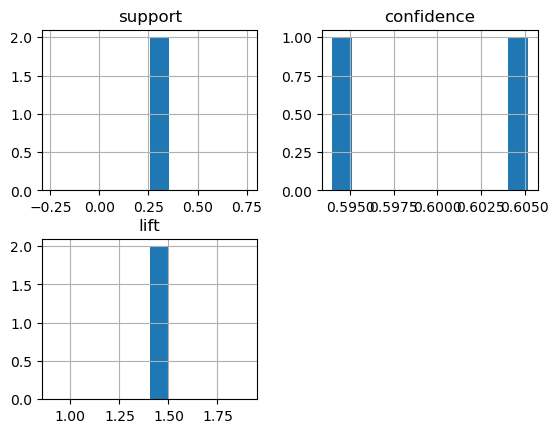

In [49]:
rules[['support','confidence','lift']].hist()

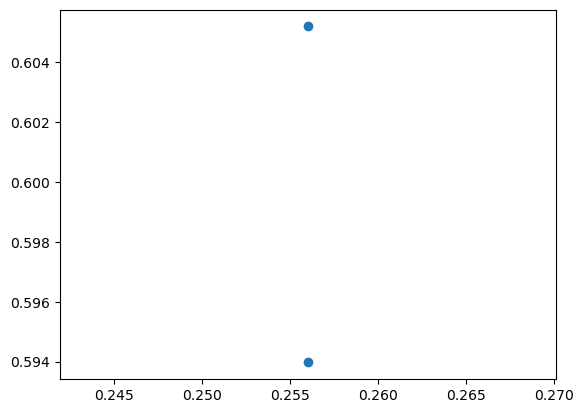

In [50]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'])
plt.show()

In [51]:
rules.sort_values('lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870


In [52]:
rules[rules.lift>1.4]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
